# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno.  
    </b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Bruno! 👏🚀 Seu trabalho está muito bom! Espero que você esteja orgulhoso do seu trabalho. 😊
    
Adicionei alguns comentários apenas como dicas.

Te desejo sucesso na sua jornada!
</div>

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np  # necessário para cálculo vetorial
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [2]:
df_mf = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
df_mf.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df_mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df_mf.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
df_mf.isna().sum()  # Verificando valores ausentes

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [10]:
df_mf.columns = df_mf.columns.str.lower()

In [11]:
df_mf.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [7]:
df_mf.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


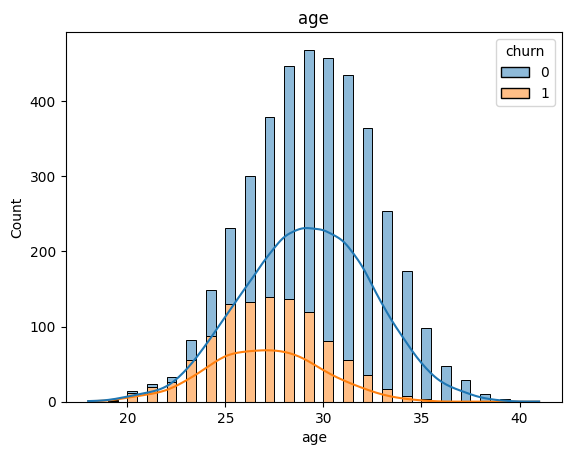

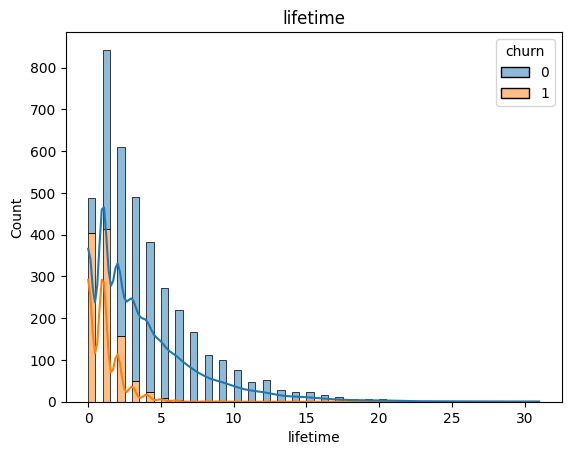

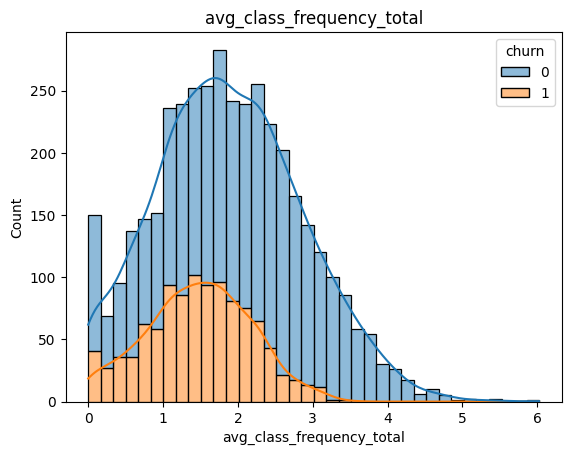

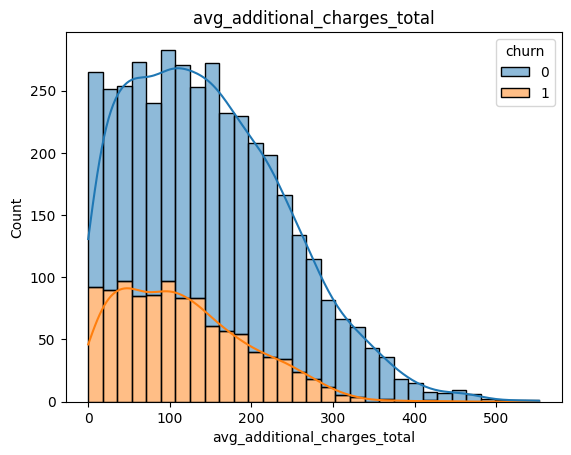

In [15]:
features = ['age', 'lifetime', 'avg_class_frequency_total', 'avg_additional_charges_total']
for col in features:
    sns.histplot(data=df_mf, x=col, hue='churn', kde=True, multiple='stack')
    plt.title(col)
    plt.show()

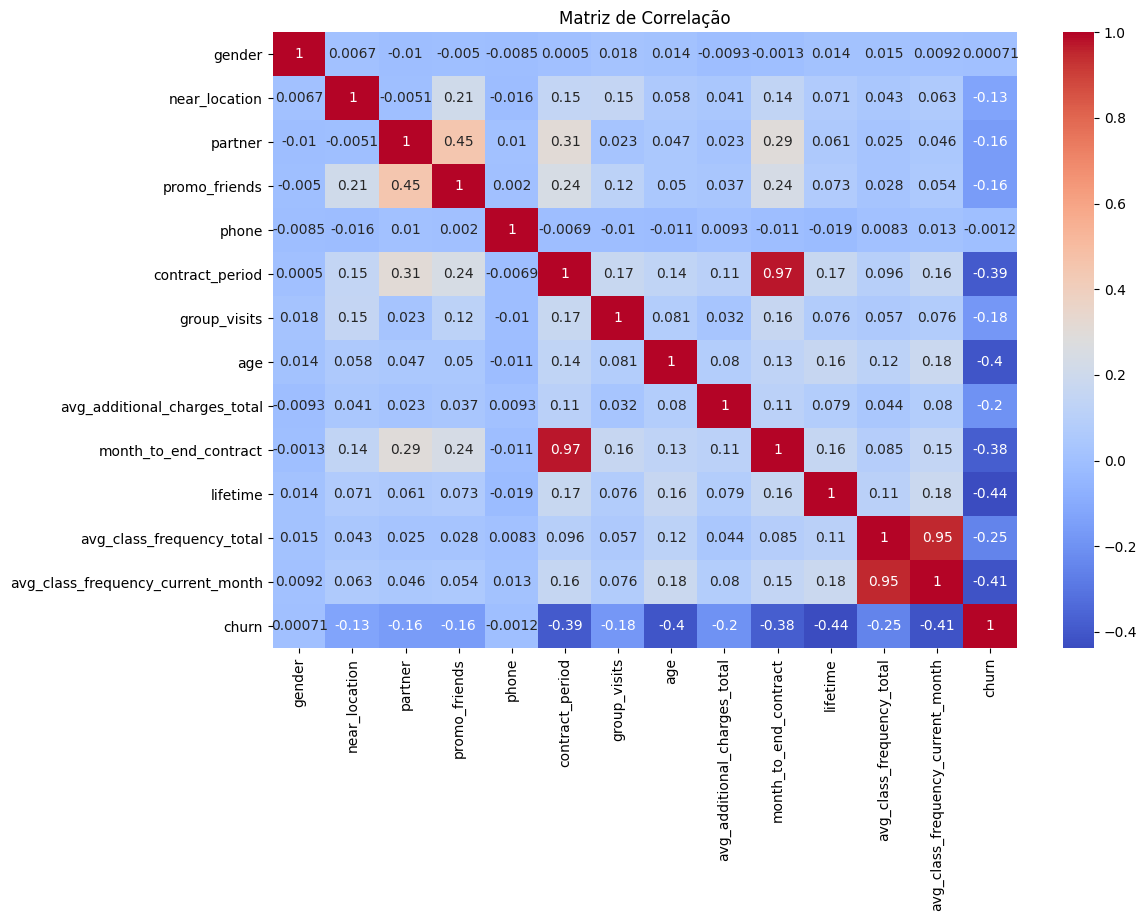

In [18]:
#fazendo a Matriz de correlação:

plt.figure(figsize=(12, 8))
sns.heatmap(df_mf.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente.
- Todos os gráficos foram plotados corretamente.
- Análises descritivas enriqueceram a análise. Parabéns!
    
    
Observação: 
    
Bom trabalho nas matrizes de correlação utilizando `corr()`! No entanto, vale lembrar que o `corr()` é excelente para variáveis numéricas, mas não é a melhor ferramenta para analisar a correlação entre variáveis categóricas. Por exemplo, mesmo que o gênero seja representado como 0 e 1, ele ainda é uma variável categórica com duas categorias distintas. Embora o uso do `corr()` não seja errado, pode levar a correlações que não refletem a realidade das variáveis categóricas.

Para medir a correlação entre variáveis categóricas, os métodos mais apropriados são:

- **Teste Qui-Quadrado de Independência**: Este teste verifica se há uma associação significativa entre duas variáveis categóricas, comparando a frequência observada em cada categoria com as frequências esperadas se as variáveis fossem independentes. Um resultado significativo indica que as variáveis podem estar associadas.

- **V de Cramér**: Esta medida de associação, derivada do teste Qui-Quadrado, é usada para variáveis nominais. Ela fornece um valor entre 0 e 1, onde 0 indica nenhuma associação e 1 indica uma associação forte. É útil para avaliar a força da relação após um resultado significativo no teste Qui-Quadrado.

- **Coeficiente Phi**: Este coeficiente é adequado para tabelas de contingência 2x2 e mede a associação entre variáveis categóricas binárias. Assim como o V de Cramér, seu valor varia de -1 a 1, onde 0 indica nenhuma associação. 
</div>

In [19]:
X = df_mf.drop(columns=['churn'])
y = df_mf['churn']

In [20]:
X = pd.get_dummies(X, drop_first=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))


Logistic Regression
Accuracy: 0.935
Precision: 0.9343434343434344
Recall: 0.8258928571428571

Random Forest
Accuracy: 0.9175
Precision: 0.9114583333333334
Recall: 0.78125


O modelo Logistic Regression apresentou melhores resultados gerais em todas as três métricas:

    Maior acurácia: acerta mais no total geral.

    Maior precisão: erra menos falsos positivos.

    Maior recall: identifica mais corretamente os clientes que vão sair (o que é crucial para ações de retenção).

<div class="alert alert-success">
<strong>Comentário</strong>

- Os modelos solicitados foram treinados corretamente e comparados. 

    
Sugestão:
    
O tunning dos parâmetros dos modelos (Ex: GridSearch) poderia trazer resultados ainda melhores.

- O modelo de floresta aleatoria pode utilizar o comando feature_importance:
-
- 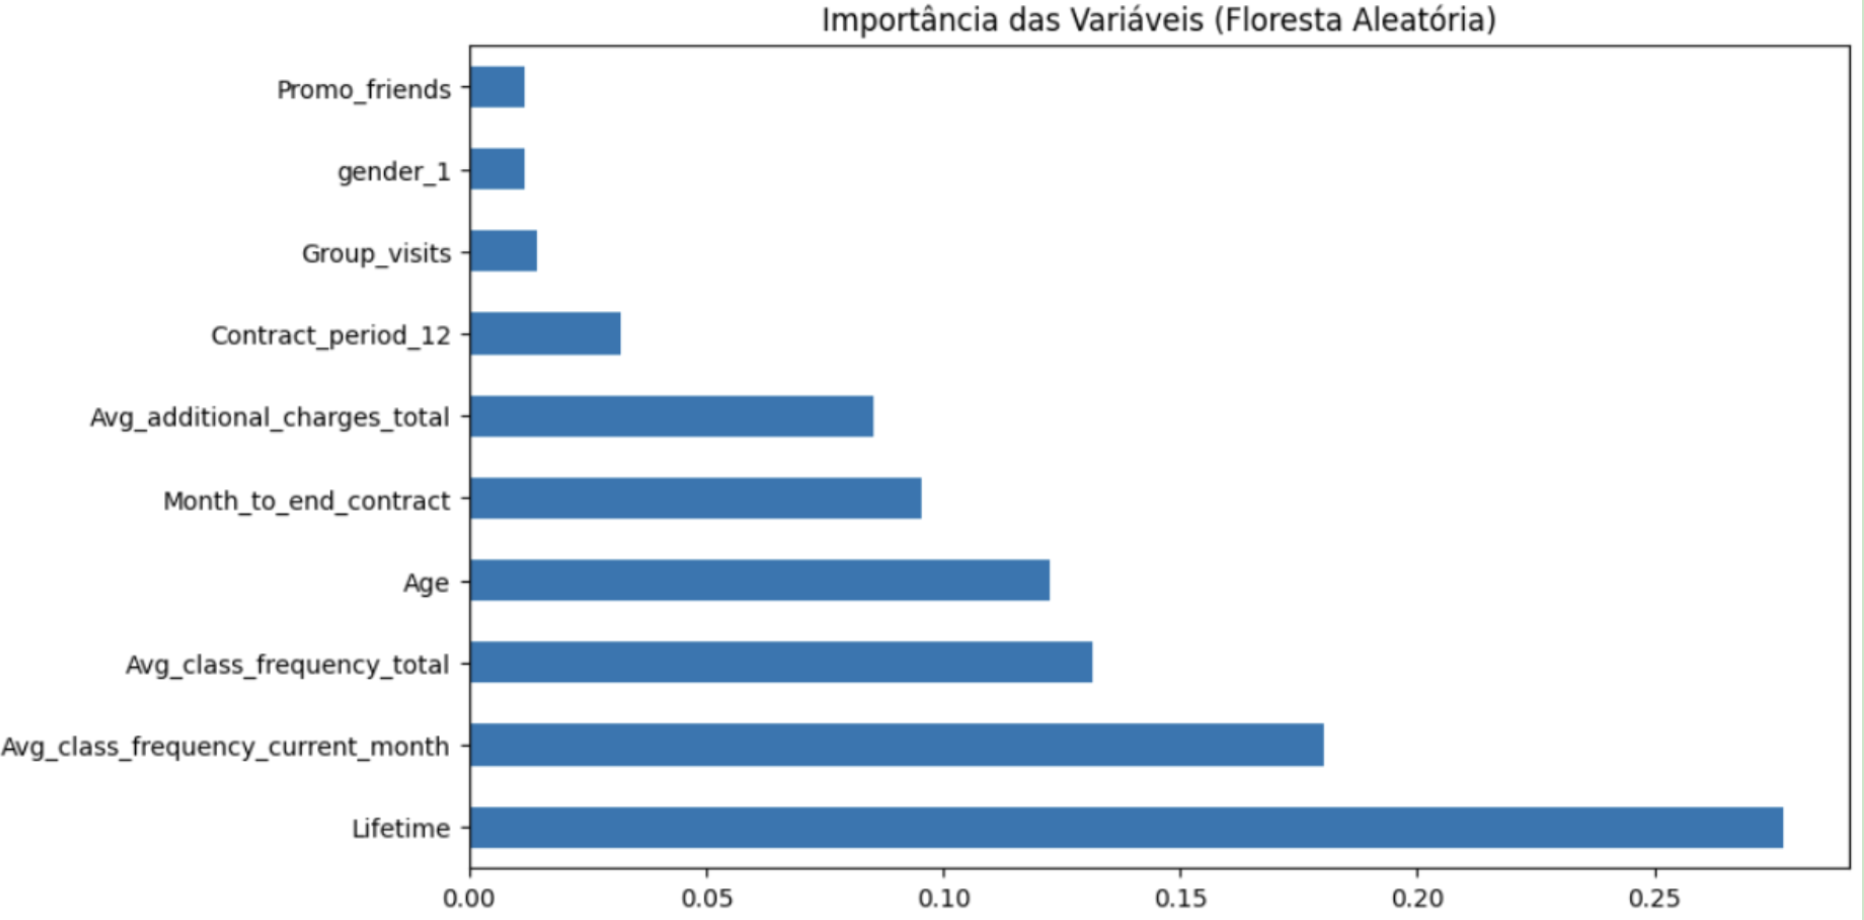

In [27]:
X1 = df_mf.drop(columns=['churn'])
X1 = pd.get_dummies(X1, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

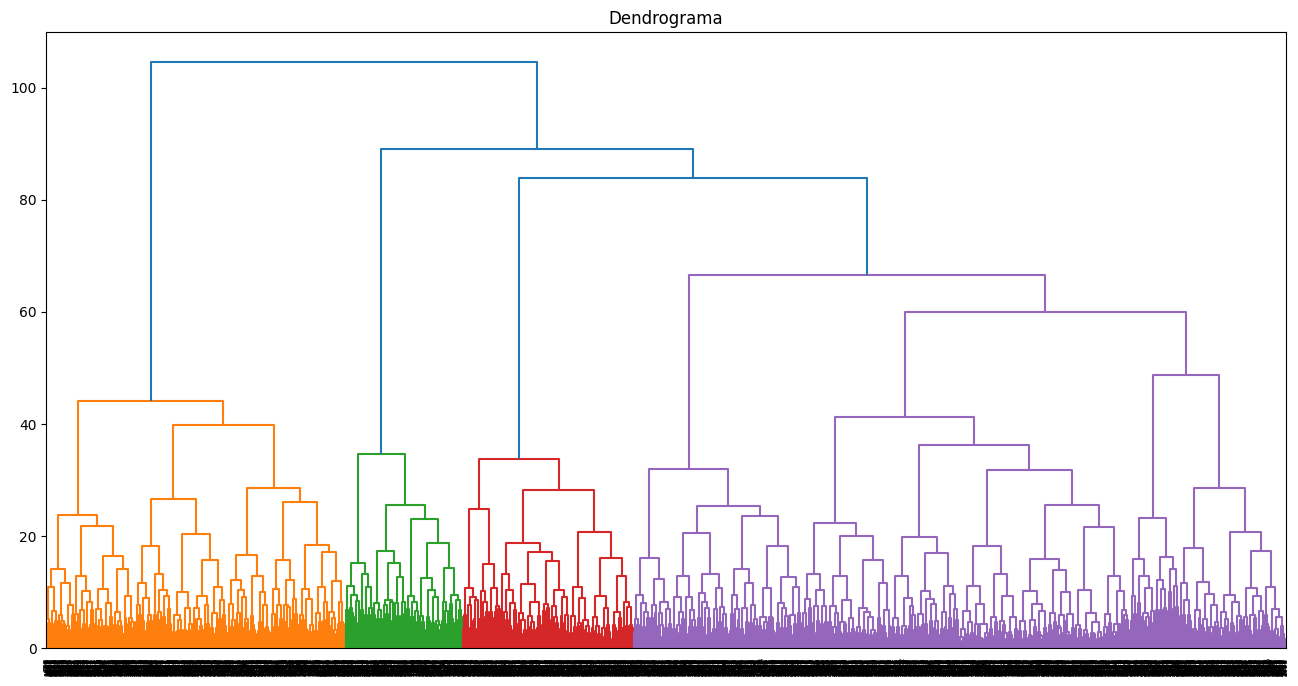

In [30]:
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.show()

<div class="alert alert-success">
<strong>Comentário</strong>
    
Dendograma realizado corretamente!

In [35]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_mf['cluster'] = kmeans.fit_predict(X_scaled)

In [36]:
cluster_means = df_mf.groupby('cluster').mean()
print(cluster_means[['churn', 'lifetime', 'avg_class_frequency_total', 'avg_additional_charges_total']])

            churn  lifetime  avg_class_frequency_total  \
cluster                                                  
0        0.246445  3.772512                   1.770536   
1        0.089989  4.780652                   2.745505   
2        0.021965  4.677457                   2.006405   
3        0.572942  2.195599                   1.225192   
4        0.266839  3.940415                   1.854211   

         avg_additional_charges_total  
cluster                                
0                          141.774331  
1                          159.774265  
2                          163.509804  
3                          129.496414  
4                          144.208179  


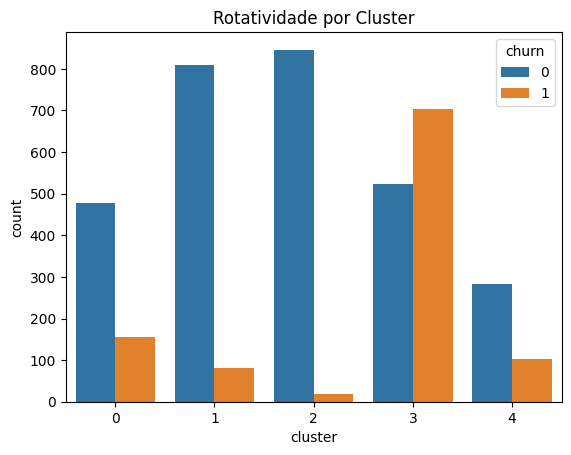

In [39]:
sns.countplot(data=df_mf, x='cluster', hue='churn')
plt.title('Rotatividade por Cluster')
plt.show()

Conclusões por cluster:

Cluster 3 (churn: 57,3% — o mais alto):

    Lifetime mais baixo (2,2 meses)

    Menor frequência média de aulas (1,23 por semana)

    Menores gastos extras (≈ R$129,50)

    Interpretação: são clientes novos, com pouco envolvimento nas atividades e baixo engajamento financeiro. Esses são os mais propensos a abandonar a academia.

Cluster 2 (churn: 2,2% — o mais baixo):

    Lifetime alto (4,68 meses)

    Boa frequência de aulas (2,00/semana)

    Gasto extra mais alto (≈ R$163,50)

    Interpretação: clientes muito fiéis, ativos nas aulas e consumidores de serviços adicionais.

Cluster 1 (churn: 9,0%):

    Maior frequência média de aulas (2,75 por semana)

    Maior lifetime (4,78 meses)

    Gastos extras altos (≈ R$159,77)

    Interpretação: grupo altamente engajado, ainda mais ativo que o cluster 2. Cliente ideal.

Cluster 0 (churn: 24,6%):

    Lifetime médio (3,77 meses)

    Frequência razoável (1,77/semana)

    Gastos medianos (≈ R$141,77)

    Interpretação: engajamento moderado, risco de churn ainda presente. Grupo a monitorar.

Cluster 4 (churn: 26,7%):

    Lifetime similar ao cluster 0 (3,94 meses)

    Frequência também moderada (1,85/semana)

    Gastos medianos (≈ R$144,21)

    Interpretação: também apresenta risco médio, com engajamento insuficiente para garantir lealdade.



Conclusões gerais:

    Clientes com menor frequência de visitas, menor tempo de contrato e menor gasto extra (como o cluster 3) são os mais propensos a abandonar a academia.

    Clientes com maior frequência de aulas, maior lifetime e que gastam mais (clusters 1 e 2) demonstram alta fidelidade e baixo churn.

Recomendações de retenção:

    Aumentar engajamento inicial dos novos clientes (cluster 3):

        Oferecer um plano de acompanhamento personalizado no primeiro mês

        Incentivar a participação em aulas em grupo

        Criar metas gamificadas (check-ins semanais)

    Incentivar uso de serviços adicionais:

        Clientes que gastam mais em serviços extras tendem a permanecer mais tempo. Ofereça programas de fidelidade ou descontos progressivos.

    Promover contratos mais longos e maior frequência:

        Planos com benefícios atrelados à frequência mínima

        Contratos de 3 a 6 meses com vantagens financeiras

    Focar na retenção dos grupos médios (clusters 0 e 4):

        Comunicação personalizada

        Ofertas de upgrade para serviços extras

        Convites para eventos ou aulas especiais

<div class="alert alert-success">
<strong>Comentário</strong>

Conclusão completa e muito bem fundamentada nos dados. Parabéns!

</div>